# Tiles, murals and numbers

In [1]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from matplotlib.patches import Polygon
import math

## Basic definitions

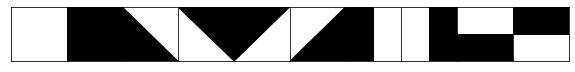

In [2]:
def get_0():
    return Polygon([(0,0)], color="k")

def get_1():
    return Polygon([(0,0), (0,1), (1,1), (1,0)], color="k")

def get_2():
    return Polygon([(0,0), (0,1), (1,0)], color="k")

def get_3():
    return Polygon([(1,0), (1,1), (0,1)], color="k")

def get_4():
    return Polygon([(0,0), (1,1), (0,1)], color="k")

def get_5():
    return Polygon([(0,0), (1,1), (1,0)], color="k")

def get_6():
    return Polygon([(0,0), (0.5,0), (0.5,1), (0,1)], color="k")

def get_7():
    return Polygon([(0.5,0),(1,0), (1,1), (0.5,1)], color="k")

def get_8():
    return Polygon([(0,0), (0,0.5), (1,0.5),(1,0)], color="k")

def get_9():
    return Polygon([(0,0.5),(1,0.5), (1,1), (0,1)], color="k")


def num2tile(num):
    if num==0:
        return get_0()
    elif num == 1:
        return get_1()
    elif num == 2:
        return get_2()
    elif num == 3:
        return get_3()
    elif num == 4:
        return get_4()
    elif num == 5:
        return get_5()
    elif num == 6:
        return get_6()
    elif num == 7:
        return get_7()
    elif num == 8:
        return get_8()
    elif num == 9:
        return get_9()
    
    
v = [0,1,2,3,4,5,6,7,8,9]
fig, _ = plt.subplots(1,10, figsize=(10,1))
fig.subplots_adjust(hspace=0.00, wspace=0.00)
for n,ax in zip(v, fig.axes):
    ax.add_patch(num2tile(n))
    ax.set_xticks([])
    ax.set_yticks([])


## Example of murals

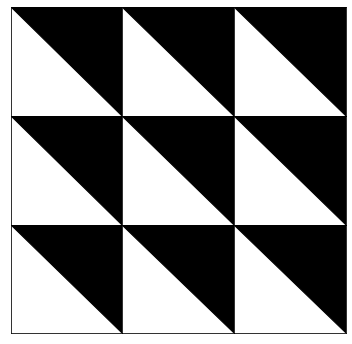

In [3]:
def float2vector(float_):
    float_str = "{:.10f}".format(float_)
    return [int(x) for x in "".join(re.findall('[0-9]+', float_str))]

v = float2vector(10/3)
fig, _ = plt.subplots(3,3, figsize=(6,6))
fig.subplots_adjust(hspace=0.00, wspace=0.00)
for n,ax in zip(v, fig.axes):
    ax.add_patch(num2tile(n))
    ax.set_xticks([])
    ax.set_yticks([])

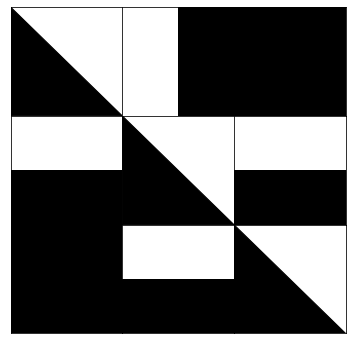

In [4]:
v = float2vector(math.e)
fig, _ = plt.subplots(3,3, figsize=(6,6))
fig.subplots_adjust(hspace=0.00, wspace=0.00)
for n,ax in zip(v, fig.axes):
    ax.add_patch(num2tile(n))
    ax.set_xticks([])
    ax.set_yticks([])

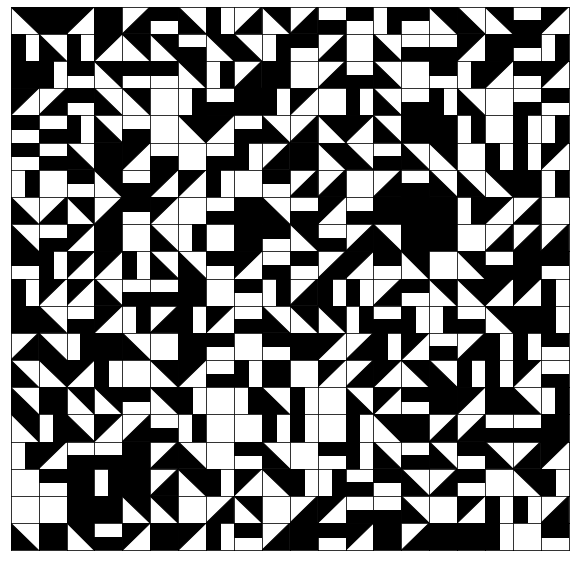

In [5]:
pi_400 = "31415926535897932384626433832795028841971693993751058209749445923078164062862089986280348253421170679821480865132823066470938446095505822317253594081284811174502841027019385211055596446229489549303819644288109756659334461284756482337867831652712019091456485669234603486104543266482133936072602491412737245870066063155881748815209209628292540917153643678925903600113305305488204665213841469519415116094"
v = [int(x) for x in "".join(pi_400)]

fig, _ = plt.subplots(20,20, figsize=(10,10))
fig.subplots_adjust(hspace=0.00, wspace=0.00)
for n,ax in zip(v, fig.axes):
    ax.add_patch(num2tile(n))
    ax.set_xticks([])
    ax.set_yticks([])

## Rotation

In [6]:
rotate_cw = {0:0, 1:1,
             2:4, 3:5,
             4:3, 5:2,
             6:8, 7:9,
             8:7, 9:6}

rotate_ccw = {0:0, 1:1,
              2:5, 3:4,
              4:2, 5:3,
              6:9, 7:8,
              8:6, 9:9}

v = [7,1,2,3]


## Convolution

In [7]:
v = [7,1,2,3]
for i,_ in enumerate(v):
    print(i,v,"\n")
    try:
        if v[i-1]%v[i] == 0:
#             print(i, v[i-1],v[i])
            v[i-1] = rotate_cw[v[i-1]]
        else:
            v[i-1] = rotate_ccw[v[i-1]]
    except IndexError:
        pass
    try:
        print(i, v[i-1],v[i])
        if v[i+1]%v[i] == 0:
            v[i+1] = rotate_cw[v[i+1]]
        else:
            v[i+1] = rotate_ccw[v[i+1]]
    except IndexError:
        pass

0 [7, 1, 2, 3] 

0 4 7
1 [7, 1, 2, 4] 

1 9 1
2 [9, 1, 4, 4] 

2 1 4
3 [9, 1, 4, 3] 

3 2 3
